参考文档：http://rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html

In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools
import pickle
import gzip
import warnings

# 简介

# 读取分子

## 读二进制

* 读取pkl文件：pickle.load(file)<br />
file：文件对象

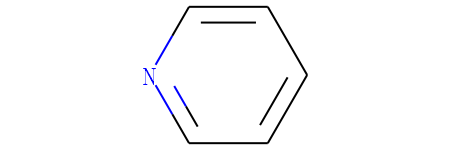

In [27]:
with open('data/output.pkl', 'rb') as f:
    m = pickle.load(f)
m

* 读取pkl字节：pickle.loads(bytes_object)<br />
bytes_object：字节对象

b'\x80\x03crdkit.Chem.rdchem\nMol\nq\x00C{\xef\xbe\xad\xde\x00\x00\x00\x00\x0b\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x06\x00\x00\x00\x80\x01\x06@h\x00\x00\x00\x03\x03\x01\x06@h\x00\x00\x00\x03\x03\x01\x06@h\x00\x00\x00\x03\x03\x01\x07@(\x00\x00\x00\x03\x03\x06@h\x00\x00\x00\x03\x03\x01\x06@h\x00\x00\x00\x03\x03\x01\x0b\x00\x01h\x0c\x01\x02h\x0c\x02\x03h\x0c\x03\x04h\x0c\x04\x05h\x0c\x05\x00h\x0c\x14\x01\x06\x00\x05\x04\x03\x02\x01\x17\x00\x00\x00\x00\x16q\x01\x85q\x02Rq\x03.'


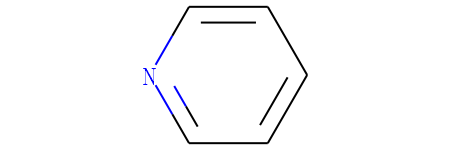

In [34]:
with open('data/output.pkl', 'rb') as f:
    pklStr = f.read()
print(pklStr)
m = pickle.loads(pklStr)
m

* 转换二进制m.ToBinary()
* 读取二进制Chem.Mol()

b'\xef\xbe\xad\xde\x00\x00\x00\x00\x0b\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x06\x00\x00\x00\x80\x01\x06@h\x00\x00\x00\x03\x03\x01\x06@h\x00\x00\x00\x03\x03\x01\x06@h\x00\x00\x00\x03\x03\x01\x07@(\x00\x00\x00\x03\x03\x06@h\x00\x00\x00\x03\x03\x01\x06@h\x00\x00\x00\x03\x03\x01\x0b\x00\x01h\x0c\x01\x02h\x0c\x02\x03h\x0c\x03\x04h\x0c\x04\x05h\x0c\x05\x00h\x0c\x14\x01\x06\x00\x05\x04\x03\x02\x01\x17\x00\x00\x00\x00\x16'


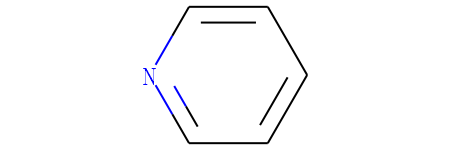

In [36]:
binStr = m.ToBinary()
print(binStr)
m = Chem.Mol(binStr)
m

## 读SMILES/SMARTS

### 直接读取

* 从SMILES/SMARTS直接读取

In [2]:
from rdkit import Chem

In [3]:
m = Chem.MolFromSmiles('C[C@H](O)c1ccccc1')
m = Chem.MolFromSmarts('Cc1ccccc1')

### 文件批量读取

* 从.smi批量读取：SmilesMolSupplier(data, delimiter, smilesColumn, nameColumn, titleLine, sanitize)<br />
data：数据文件<br />
delimiter：分隔符，默认为' '<br />
smilesColumn：SMILES所在列，默认为0<br />
nameColumn：SMILES名称所在列，默认为1<br />
titleLine：是否含有标题行，默认True<br />
sanitize：是否检查正确性，默认True

In [5]:
suppl = Chem.SmilesMolSupplier('data/batch_smiles.smi', delimiter='\t')
mols = [Chem.MolToSmiles(mol) for mol in suppl]
print(mols)

['C1=CC=CC=CC=C1', 'c1ccccc1', 'c1ccoc1']


### 文本批量读取

* 从文本批量读取SmilesMolSupplierFromText()<br />
参数基本同上

In [8]:
with open('data/batch_smiles.smi', 'r') as f:
    mols_text = f.read()
suppl = Chem.SmilesMolSupplierFromText(mols_text, delimiter='\t')
mols = [Chem.MolToSmiles(mol) for mol in suppl]
print(mols)

['C1=CC=CC=CC=C1', 'c1ccccc1', 'c1ccoc1']


### DataFrame批量读取

* 读取DataFrame中的SMILES：PandasTools.AddMoleculeColumnToFrame(frame, smilesCol, molCol, includeFingerprints)<br />
frame：DataFrame对象<br />
smilesCol：SMILES所在列<br />
molCol：新列名，将存放产生的rdkit mol对象<br />
includeFingerprints：是否生成指纹

In [13]:
df = pd.read_csv('data/smiles_df.csv')
PandasTools.AddMoleculeColumnToFrame(df,'SMILES','mol',includeFingerprints=True)
df['MW'] = df['mol'].apply(Descriptors.MolWt)
print(df.head(2))

           Name                                             SMILES  \
0    Lanreotide  c1(c2c(cccc2)[nH]c1)C[C@@H]1NC(=O)[C@@H](Cc2cc...   
1  Lansoprazole        Cc1c(OCC(F)(F)F)ccnc1CS(=O)c2nc3ccccc3[nH]2   

                                                 mol        MW  
0  <img data-content="rdkit/molecule" src="data:i...  1096.347  
1  <img data-content="rdkit/molecule" src="data:i...   369.368  


## 读.sdf

### 文件批量读取

* 从.sdf里批量读取：Chem.SDMolSupplier(fileName, sanitize, removeHs, strictParsing)<br />
fileName：文件名<br />
sanitize：检查化合价，计算芳香性、共轭、杂化、kekule，默认True<br />
removeHs：是否隐藏氢原子，默认True<br />
strictParsing：是否使用严格模式进行解析，默认True

In [15]:
suppl = Chem.SDMolSupplier('data/batch.sdf')
mols = [Chem.MolToSmiles(mol) for mol in suppl if mol]
print(mols)

['C1=C\\C=C/C=C\\C=C/1', 'c1ccccc1', 'c1ccoc1']


### 压缩包批量读取

* 从file object/.gz里读取

In [18]:
gz_file = gzip.open('data/batch.sdf.gz', 'r')
suppl = Chem.ForwardSDMolSupplier(gz_file)
mols = [Chem.MolToSmiles(mol) for mol in suppl if mol]
print(mols)
f.close()

['C1=C\\C=C/C=C\\C=C/1', 'c1ccccc1', 'c1ccoc1']


## 读.mol

* 从.mol里读取：Chem.MolFromMolFile(fileName, sanitize, removeHs, strictParsing)

In [22]:
m = Chem.MolFromMolFile('data/output.mol')
print(Chem.MolToSmiles(mol))

c1cocc1


## 读.mol2<br />
不推荐，容易出bug

* 从.mol2里读取

In [23]:
m = Chem.MolFromMol2File('data/output.mol2')
print(Chem.MolToSmiles(m))

[C]1[C][C][C]1


## 读其他格式：pdb, fasta, ...
其他格式大同小异，不再赘述了，感兴趣可自己尝试

* 从.pdb里读取

In [ ]:
Chem.MolFromPDBFile()
Chem.MolFromPDBBlock()

* 读.fasta

In [ ]:
Chem.MolFromFASTA()

* 读peptide

In [ ]:
Chem.MolFromSequence()

# 输出分子

## 输出二进制

* 可以使用python的pickle将分子转成二进制<br />
相对于SMILES和文件，二进制pkl格式体积更小，读取速度更快<br />
* 输出pkl文件：pickle.dump(obj, file, ...)<br />
obj：要封装的对象<br />
file：要写入的文件<br />

In [42]:
m = Chem.MolFromSmiles('c1ccncc1')
with open('data/output.pkl', 'wb') as f:
    pickle.dump(m, f)

* 输出pkl字节：pickle.dumps()

In [43]:
pkl = pickle.dumps(m)
pkl

b'\x80\x03crdkit.Chem.rdchem\nMol\nq\x00C{\xef\xbe\xad\xde\x00\x00\x00\x00\x0b\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x06\x00\x00\x00\x80\x01\x06@h\x00\x00\x00\x03\x03\x01\x06@h\x00\x00\x00\x03\x03\x01\x06@h\x00\x00\x00\x03\x03\x01\x07@(\x00\x00\x00\x03\x03\x06@h\x00\x00\x00\x03\x03\x01\x06@h\x00\x00\x00\x03\x03\x01\x0b\x00\x01h\x0c\x01\x02h\x0c\x02\x03h\x0c\x03\x04h\x0c\x04\x05h\x0c\x05\x00h\x0c\x14\x01\x06\x00\x05\x04\x03\x02\x01\x17\x00\x00\x00\x00\x16q\x01\x85q\x02Rq\x03.'

* 输出二进制m.ToBinary()

In [44]:
binStr = m.ToBinary()
binStr

b'\xef\xbe\xad\xde\x00\x00\x00\x00\x0b\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x06\x00\x00\x00\x80\x01\x06@h\x00\x00\x00\x03\x03\x01\x06@h\x00\x00\x00\x03\x03\x01\x06@h\x00\x00\x00\x03\x03\x01\x07@(\x00\x00\x00\x03\x03\x06@h\x00\x00\x00\x03\x03\x01\x06@h\x00\x00\x00\x03\x03\x01\x0b\x00\x01h\x0c\x01\x02h\x0c\x02\x03h\x0c\x03\x04h\x0c\x04\x05h\x0c\x05\x00h\x0c\x14\x01\x06\x00\x05\x04\x03\x02\x01\x17\x00\x00\x00\x00\x16'

## 输出SMILES/SMARTS

### 输出默认式

* 输出SMILES：MolToSmiles(mol, isomericSmiles, kekuleSmiles, canonical, ...)<br />
kekuleSmiles：默认False，不使用kekule时：脂肪族碳用"C"表示（大写），芳香族用"c"表示（小写）<br />
isomericSmiles：默认True，区分同分异构体（"@"表示手性，"\"和"/"表示顺反异构）<br />
canonical：默认True，输出标准SMILES <br />

In [21]:
m1 = Chem.MolFromSmiles('C1=CC=CC=CC=C1')
m2 = Chem.MolFromSmiles('C1=CC=CC=C1')
m3 = Chem.MolFromSmiles('C1=COC=C1')
mols = [m1, m2, m3]
print([Chem.MolToSmiles(mol) for mol in mols])

['C1=CC=CC=CC=C1', 'c1ccccc1', 'c1ccoc1']


### 输出kekule式

* 输出kekule形式<br />
kekule形式：在符合4N+2规则的芳香体系中，通过使用双键代替小写的碳原子来表示芳香性<br />
4N+2规则：也叫Hueckel规则，在闭环共轭体系中，当π电子数为4n+2时，才具有芳香性<br />
注：m1有共轭结构，但不属于芳香系统。m3中氧提供了2个π电子，碳各提供1个，总数为6，属于芳香系统

In [3]:
for mol in mols:
    Chem.Kekulize(mol)
print([Chem.MolToSmiles(mol, kekuleSmiles=True) for mol in mols])

['C1=CC=CC=CC=C1', 'C1=CC=CC=C1', 'C1=COC=C1']


### 设置立体参数

* 不区分同分异构体<br />
通过isomericSmiles控制

In [22]:
m4 = Chem.MolFromSmiles('C[C@H](O)c1ccccc1')
print(Chem.MolToSmiles(m4))
print(Chem.MolToSmiles(m4, isomericSmiles=False))

C[C@H](O)c1ccccc1
CC(O)c1ccccc1


### 批量输出SMILES

* 批量输出SMILES：SmilesWriter(fileName, delimiter, includeHeader, nameHeader, isomericSmiles, kekuleSmiles) <br />
fileName：输出文件名<br />
delimiter：分隔符，默认为' '<br />
includeHeader：是否写入表头，默认True<br />
nameHeader：分子名一列的列名，默认'Name'<br />
isomericSmiles：立体信息，默认True<br />
kekuleSmiles：kekule形式，默认False<br />
返回一个writer对象<br />
* 写入SMILES：writer(mol, confId) <br />
mol：mol对象<br />
conFId：写入的第几个构象

In [23]:
writer = Chem.SmilesWriter('data/batch.smi', delimiter='\t')
for i, mol in enumerate(mols):
    writer.write(mol)
writer.close()

In [24]:
%more data/batch.smi

SMILES	Name	
C1=CC=CC=CC=C1	0
c1ccccc1	1
c1ccoc1	2


### 批量输出SMILES和属性

* 批量输出SMILES及属性，通过以下函数进行操作：<br />
mol.GetPropNames()，查看分子属性列表<br />
mol.GetProp()，获取相应属性<br />
mol.SetProp(key, val)，新增属性名key、对应属性值val<br />
writer.SetProps()，设置哪些属性要输出

* 以输出分子量和LogP为例<br />
使用Descriptors计算属性，并添加

In [7]:
writer = Chem.SmilesWriter('data/batch_smiles.smi', delimiter='\t', nameHeader='mol_id')
writer.SetProps(['LOGP', 'MW'])
for i, mol in enumerate(mols):
    mw = Descriptors.ExactMolWt(mol)
    logp = Descriptors.MolLogP(mol)
    mol.SetProp('MW', '%.2f' %(mw))
    mol.SetProp('LOGP', '%.2f' %(logp))
    mol.SetProp('_Name', 'No_%s' %(i))
    writer.write(mol)
writer.close()
print('number of mols:', writer.NumMols())
print('mol properties:', [i for i in mol.GetPropNames()])

number of mols: 3
mol properties: ['MW', 'LOGP']


In [8]:
%more data/batch_smiles.smi

SMILES	mol_id	LOGP	MW
C1=CC=CC=CC=C1	No_0	2.22	104.06
c1ccccc1	No_1	1.69	78.05
c1cocc1	No_2	1.28	68.03


### 输出SMARTS

* 输出SMARTS：MolToSmarts()<br />

In [25]:
Chem.MolToSmarts(m3, isomericSmiles=True)

'[#6]1:[#6]:[#8]:[#6]:[#6]:1'

## 输出.sdf

### 批量输出到.sdf

* 批量输出到文件：SDWriter()<br />
使用方法类似于SMILES的批量输出<br />
可以自定义属性信息，并记录在.sdf文件中<br />
返回writer对象
* 写入sdf：writer(mol, confId) <br />
mol：mol对象<br />
conFId：写入的第几个构象（不同构象坐标不一样）

In [10]:
writer = Chem.SDWriter('data/batch.sdf')
writer.SetProps(['LOGP', 'MW'])
for i, mol in enumerate(mols):
    mw = Descriptors.ExactMolWt(mol)
    logp = Descriptors.MolLogP(mol)
    mol.SetProp('MW', '%.2f' %(mw))
    mol.SetProp('LOGP', '%.2f' %(logp))
    mol.SetProp('_Name', 'No_%s' %(i))
    writer.write(mol)
writer.close()

In [11]:
%more data/batch.sdf

No_0
     RDKit          2D

  8  8  0  0  0  0  0  0  0  0999 V2000
    1.9598    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.3858   -1.3858    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.9598    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3858   -1.3858    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9598    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3858    1.3858    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.9598    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.3858    1.3858    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  7  1  0
  7  8  2  0
  8  1  1  0
M  END
>  <LOGP>  (1) 
2.22

>  <MW>  (1) 
104.06

$$$$
No_1
     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  

### 批量输出到.gz

* 批量输出到.gz<br />

In [12]:
outf = gzip.open('data/batch.sdf.gz','wt+')
writer = Chem.SDWriter(outf)
for mol in mols:
    writer.write(mol)
writer.close()
outf.close()

## 输出.mol

### 输出为连接表

* 直接输出：MolToMolBlock()

In [13]:
m1 = Chem.MolFromSmiles('C1CCC1')
print(Chem.MolToMolBlock(m1))


     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



### 输出到.mol

* 输出到文件：MolToMolFile(mol, filename, includeStereo, ...)
mol：mol对象
filename：文件名
includeStereo：立体信息，默认True

In [14]:
m1.SetProp('_Name', 'cyclobutane')
Chem.MolToMolFile(m1, 'data/output.mol')

In [15]:
%more data/output.mol

cyclobutane
     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END


## 输出其他格式:pdb, fasta, xyz...
其他一些格式，大同小异，不多赘述了，感兴趣的自己可以尝试下

* 输出.pdb

In [ ]:
Chem.MolToPDBBlock()
Chem.MolToPDBFile()
Chem.PDBWriter()

* 输出.fasta

In [ ]:
Chem.MolToFASTA()

* 输出.xyz

In [ ]:
Chem.MolToXYZBlock()
Chem.MolToXYZFile()

# 分子可视化

## 单个展示

* 从mol对象到图片：MolToImage(mol, size, kekulize, wedgeBonds, fitImage, ...)<br />
mol：mol对象<br />
size：图片尺寸，默认(300, 300)<br />
kekulize：是否展示kekule形式，默认True（True：芳香系统用实线表示，False：虚线表示）<br />
wedgeBonds：是否展示楔形键，即立体构型，默认True

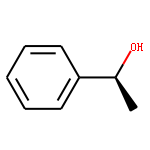

In [45]:
mol = Chem.MolFromSmiles('C[C@H](O)c1ccccc1')
Draw.MolToImage(mol, size=(150,150), kekulize=True)

* 在新窗口中展示图片：ShowMol()<br />
参数基本同上

In [46]:
Draw.ShowMol(mol, size=(150,150), kekulize=False)

* 保存图片MolToFile(mol, filename, size, kekulize, wedgeBonds, ...)<br />
参数基本同上

In [26]:
Draw.MolToFile(mol, 'data/output.png', size=(150, 150))

## 批量展示

### 从DataFrame中展示

* 从df中展示：FrameToGridImage(frame, column, molsPerRow, subImgSize, legendsCol, ...)<br />
frame：DataFrame对象<br />
column：rdkit mol对象所在列<br />
molsPerRow,：每行显示的分子数<br />
subImgSize：图片大小<br />
legendsCol：标题所在列

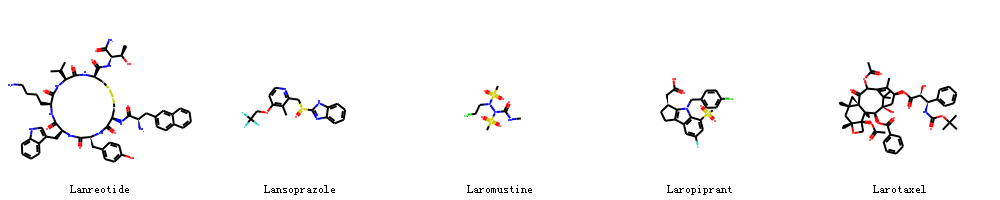

In [34]:
df = pd.read_csv('data/smiles_df.csv')
PandasTools.AddMoleculeColumnToFrame(df,'SMILES','mol',includeFingerprints=True)
img = PandasTools.FrameToGridImage(df, column='mol', molsPerRow=5, subImgSize=(200,200), legendsCol='Name')
img

* 保存

In [29]:
img.save('data/df.png')  

### 从mol列表中展示

* 从列表生成分子结构：MolsToGridImage(mols, maxMols, molsPerRow, subImgSize, legends, ...)<br />
部分参数和上面的一致<br />
mols：mol对象列表<br />
maxMols：最多显示的分子数 <br />
molsPerRow,：每行显示的分子数<br />
subImgSize：图片大小<br />
legends：标题<br />

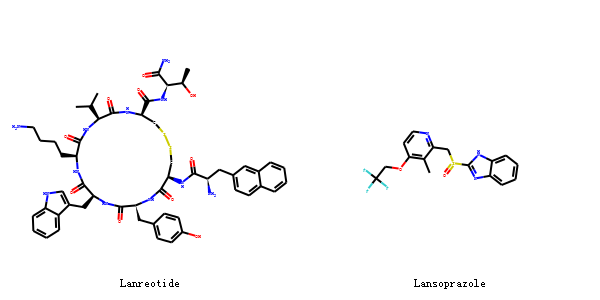

In [36]:
warnings.filterwarnings("ignore")
mols = df.mol.tolist()
legends = df.Name.tolist()
img = Draw.MolsToGridImage(mols, maxMols=2, molsPerRow=2, subImgSize=(300,300), legends=legends)  
img

In [ ]:
img.save('data/mols.png')  

## 3D展示

* 转换3D时，为了得到靠谱的三维构象，一般先加氢：AddHs(mol)
* 通过距离几何算法计算3D坐标：EmbedMolecule(mol, randomSeed, ...)<br />
mol：mol对象<br />
randomSeed：随机种子

* 转换完后再进行一步力场优化，比如MMFF94：MMFFOptimizeMolecule(mol)

In [29]:
m3d = Chem.MolFromSmiles('CNC(=O)N(N(CCCl)S(C)(=O)=O)S(C)(=O)=O')
m3d = Chem.AddHs(m3d)
AllChem.EmbedMolecule(m3d, randomSeed=3)
AllChem.MMFFOptimizeMolecule(m3d)

1

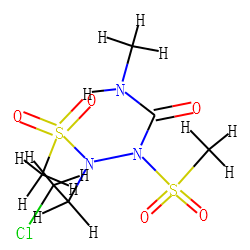

In [30]:
Draw.MolToImage(m3d, size=(250,250))